# Movie Recommender System
## from kaggle Movie Lens dataset

### https://www.kaggle.com/shubhammehta21/movie-lens-small-latest-dataset?select=README.txt

### About this dataset
Summary
=======

This dataset  describes 5-star rating and free-text tagging activity from [MovieLens](http://movielens.org), a movie recommendation service. It contains 100836 ratings and 3683 tag applications across 9742 movies. These data were created by 610 users between March 29, 1996 and September 24, 2018. This dataset was generated on September 26, 2018.
The data are contained in the files `links.csv`, `movies.csv`, `ratings.csv` and `tags.csv`. 

Recommendation based on similarity of movies and user behaviour.

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

## DATA Import

In [2]:
df=pd.read_csv("ratings.csv")
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
movie_df=pd.read_csv("movies.csv")
movie_df.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## joining both datasets

In [4]:
df=pd.merge(df,movie_df,on="movieId")
df.head(5)


,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [5]:
#df[df['title']=='Pirates of the Caribbean: The Curse of the Black Pearl (2003)']#Action|Adventure|Comedy|Fantasy
#df[df['title']=='Toy Story (1995)']##Adventure|Animation|Children|Comedy|Fantasy

#df[df['title']=='10 Cloverfield Lane (2016)']#Action|Adventure|Sci-Fi

## Data analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
 4   title      100836 non-null  object 
 5   genres     100836 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 5.4+ MB


## Showing mean rating of all movies

In [7]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
Name: rating, dtype: float64

In [8]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


## Showing count of rating of all movies

In [9]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [10]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()


,rating,num of ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


## Inserting genres column

In [11]:
ratings['genres'] = pd.DataFrame(df.groupby('title')['genres'].max())
ratings.head(5)

,rating,num of ratings,genres
title,,,
'71 (2014),4.0,1,Action|Drama|Thriller|War
'Hellboy': The Seeds of Creation (2004),4.0,1,Action|Adventure|Comedy|Documentary|Fantasy
'Round Midnight (1986),3.5,2,Drama|Musical
'Salem's Lot (2004),5.0,1,Drama|Horror|Mystery|Thriller
'Til There Was You (1997),4.0,2,Drama|Romance


<AxesSubplot:xlabel='num of ratings', ylabel='Count'>

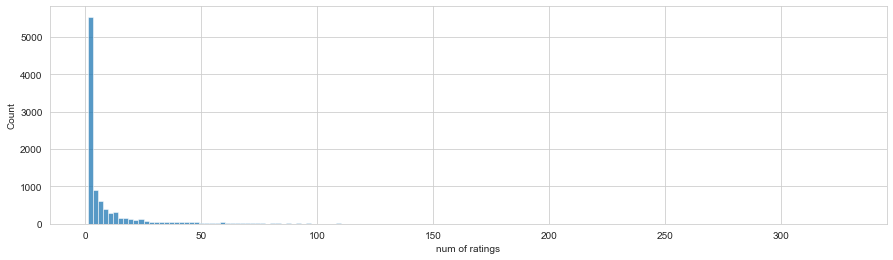

In [12]:
plt.figure(figsize=(15,4))
sns.histplot(ratings['num of ratings'],bins=150)

<AxesSubplot:xlabel='rating', ylabel='Count'>

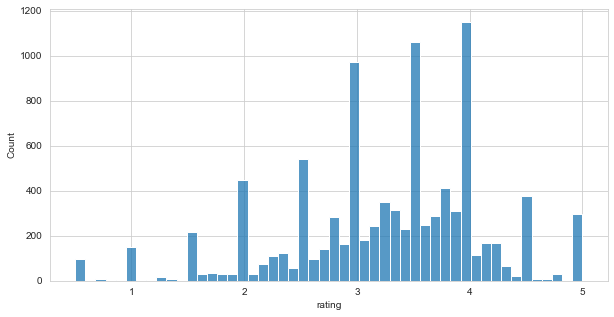

In [13]:
plt.figure(figsize=(10,5))
sns.histplot(ratings['rating'],bins=50)


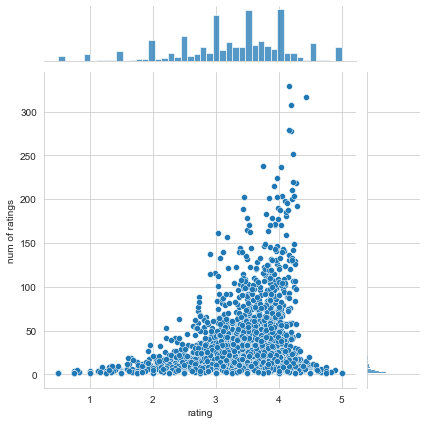

In [14]:
sns.jointplot(x='rating',y='num of ratings',data=ratings)

## Recommending Similar movies

creating a matrix that has the user ids on one access and the movie title on another axis. Each cell will then consist of the rating the user gave to that movie.
NaN values in it means that person  have not seen that movie.

In [15]:
movie = df.pivot_table(index='userId',columns='title',values='rating')
movie.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Most rated movies

In [16]:
ratings.sort_values('num of ratings',ascending=False).head(5)

,rating,num of ratings,genres
title,,,
Forrest Gump (1994),4.164134,329,Comedy|Drama|Romance|War
"Shawshank Redemption, The (1994)",4.429022,317,Crime|Drama
Pulp Fiction (1994),4.197068,307,Comedy|Crime|Drama|Thriller
"Silence of the Lambs, The (1991)",4.161290,279,Crime|Horror|Thriller
"Matrix, The (1999)",4.192446,278,Action|Sci-Fi|Thriller


### we'll take two movies: starwars which is a sci-fi,action movie. And toy story which is a animation,comedy

In [17]:
#Star Wars: Episode IV - A New Hope (1977)	4.231076	251	Action|Adventure|Sci-Fi
#Toy Story (1995)	3.920930	215	Adventure|Animation|Children|Comedy|Fantasy
#Pirates of the Caribbean: The Curse of the Black Pearl (2003)	3.778523	149	Action|Adventure|Comedy|Fantasy
##Titanic (1997)	3.414286	140	Drama|Romance
##Finding Nemo (2003)	3.960993	141	Adventure|Animation|Children|Comedy
##Men in Black (a.k.a. MIB) (1997)	3.487879	165	Action|Comedy|Sci-Fi

## Grabbing the user ratings of the above two movies.

In [18]:
starwars_ratings = movie['Star Wars: Episode IV - A New Hope (1977)']
toystory_ratings = movie['Toy Story (1995)']
starwars_ratings.head()

userId
1    5.0
2    NaN
3    NaN
4    5.0
5    NaN
Name: Star Wars: Episode IV - A New Hope (1977), dtype: float64

## Using corrwith() method to get correlations between two pandas series:

In [19]:
starwars_ratings = movie.corrwith(starwars_ratings)
toystory_ratings = movie.corrwith(toystory_ratings)

In [20]:
toystory_ratings

title
'71 (2014)                                        NaN
'Hellboy': The Seeds of Creation (2004)           NaN
'Round Midnight (1986)                            NaN
'Salem's Lot (2004)                               NaN
'Til There Was You (1997)                         NaN
                                               ...   
eXistenZ (1999)                              0.333282
xXx (2002)                                  -0.244733
xXx: State of the Union (2005)               0.129969
¡Three Amigos! (1986)                       -0.387202
À nous la liberté (Freedom for Us) (1931)         NaN
Length: 9719, dtype: float64

## cleaning NaN values and putting it in a dataframe.

In [21]:
corr_starwars = pd.DataFrame(starwars_ratings,columns=['Correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.head()

,Correlation
title,
"'burbs, The (1989)",0.155161
(500) Days of Summer (2009),0.024299
*batteries not included (1987),-0.269069
10 Cent Pistol (2015),1.000000
10 Cloverfield Lane (2016),0.360885


Now if we sort the dataframe by correlation, we should get the most similar movies, however note that we get some results that don't really make sense. This is because there are a lot of movies only watched once by users who also watched star wars (it was the most popular movie). 

In [22]:
corr_starwars.sort_values('Correlation',ascending=False).head(5)

,Correlation
title,
Lakeview Terrace (2008),1.0
Mysterious Skin (2004),1.0
Nerve (2016),1.0
Creep (2014),1.0
Non-Stop (2014),1.0


In [32]:
#corr_starwars[corr_starwars[]]
#corr_starwars.loc['10 Cloverfield Lane (2016)']

Let's fix this by filtering out movies that have less than 50 reviews (this value was chosen based off the histogram from earlier)

In [26]:

corr_starwars_new=pd.merge(ratings,corr_starwars,on="title")
corr_starwars_new.head()

,rating,num of ratings,genres,Correlation
title,,,,
"'burbs, The (1989)",3.176471,17,Comedy,0.155161
(500) Days of Summer (2009),3.666667,42,Comedy|Drama|Romance,0.024299
*batteries not included (1987),3.285714,7,Children|Comedy|Fantasy|Sci-Fi,-0.269069
10 Cent Pistol (2015),1.250000,2,Crime|Thriller,1.000000
10 Cloverfield Lane (2016),3.678571,14,Thriller,0.360885


NOW SORTING ON THE BASIS OF CORRELATION FOR MOVIE "Star Wars: Episode IV - A New Hope (1977)"

In [31]:
corr_starwars_new[corr_starwars_new['num of ratings']>50].sort_values('Correlation',ascending=False).head(10)

,rating,num of ratings,genres,Correlation
title,,,,
Star Wars: Episode IV - A New Hope (1977),4.231076,251,Action|Adventure|Sci-Fi,1.000000
Star Wars: Episode V - The Empire Strikes Back (1980),4.215640,211,Action|Adventure|Sci-Fi,0.777970
Star Wars: Episode VI - Return of the Jedi (1983),4.137755,196,Action|Adventure|Sci-Fi,0.734230
"Fugitive, The (1993)",3.992105,190,Thriller,0.482078
Slumdog Millionaire (2008),3.809859,71,Crime|Drama|Romance,0.479859
Bowling for Columbine (2002),3.775862,58,Documentary,0.464610
28 Days Later (2002),3.974138,58,Action|Horror|Sci-Fi,0.451605
Inglourious Basterds (2009),4.136364,88,Action|Drama|War,0.448799
"Hunt for Red October, The (1990)",3.872222,90,Action|Adventure|Thriller,0.421778


## Now for movie toy story

In [45]:
corr_toystory = pd.DataFrame(toystory_ratings,columns=['Correlation'])
corr_toystory.dropna(inplace=True)
corr_toystory_new=pd.merge(ratings,corr_toystory,on="title")
corr_toystory_new[corr_toystory_new['num of ratings']>40].sort_values('Correlation',ascending=False).head(20)

,rating,num of ratings,genres,Correlation
title,,,,
Toy Story (1995),3.920930,215,Adventure|Animation|Children|Comedy|Fantasy,1.000000
Toy Story 2 (1999),3.860825,97,Adventure|Animation|Children|Comedy|Fantasy,0.699211
Arachnophobia (1990),2.811321,53,Comedy|Horror,0.652424
"Incredibles, The (2004)",3.836000,125,Action|Adventure|Animation|Children|Comedy,0.643301
Finding Nemo (2003),3.960993,141,Adventure|Animation|Children|Comedy,0.618701
Aladdin (1992),3.792350,183,Adventure|Animation|Children|Comedy|Musical,0.611892
"Naked Gun: From the Files of Police Squad!, The (1988)",3.404762,42,Action|Comedy|Crime|Romance,0.607630
Erin Brockovich (2000),3.528571,70,Drama,0.598016
Beverly Hills Cop (1984),3.402174,46,Action|Comedy|Crime|Drama,0.591819


## for movie Pirates of the Caribbean: The Curse of the Black Pearl (2003)

In [39]:
Pirates_ratings = movie['Pirates of the Caribbean: The Curse of the Black Pearl (2003)']
Pirates_ratings = movie.corrwith(Pirates_ratings)

In [46]:
corr_Pirates = pd.DataFrame(Pirates_ratings,columns=['Correlation'])
corr_Pirates.dropna(inplace=True)
corr_Pirates_new=pd.merge(ratings,corr_Pirates,on="title")
corr_Pirates_new[corr_Pirates_new['num of ratings']>30].sort_values('Correlation',ascending=False).head(15)

,rating,num of ratings,genres,Correlation
title,,,,
Pirates of the Caribbean: The Curse of the Black Pearl (2003),3.778523,149,Action|Adventure|Comedy|Fantasy,1.000000
"Madness of King George, The (1994)",3.758065,31,Comedy|Drama,0.998031
"Indian in the Cupboard, The (1995)",3.235294,34,Adventure|Children|Fantasy,0.734059
Captain America: The Winter Soldier (2014),3.741935,31,Action|Adventure|Sci-Fi|IMAX,0.722840
Sneakers (1992),3.478261,46,Action|Comedy|Crime|Drama|Sci-Fi,0.693602
In the Line of Fire (1993),3.692857,70,Action|Thriller,0.683906
Desperado (1995),3.560606,66,Action|Romance|Western,0.673609
Die Hard: With a Vengeance (1995),3.555556,144,Action|Crime|Thriller,0.670508
Pirates of the Caribbean: Dead Man's Chest (2006),3.506944,72,Action|Adventure|Fantasy,0.668055


## For movie Harry Potter and the Deathly Hallows: Part 2 (2011)

In [47]:
Harry_ratings = movie['Harry Potter and the Deathly Hallows: Part 2 (2011)']
Harry_ratings = movie.corrwith(Harry_ratings)

In [52]:
corr_Harry = pd.DataFrame(Harry_ratings,columns=['Correlation'])
corr_Harry.dropna(inplace=True)
corr_Harry_new=pd.merge(ratings,corr_Harry,on="title")
corr_Harry_new[corr_Harry_new['num of ratings']>40].sort_values('Correlation',ascending=False).head(50)

,rating,num of ratings,genres,Correlation
title,,,,
"English Patient, The (1996)",3.711111,45,Drama|Romance|War,1.000000
"Client, The (1994)",3.385965,57,Drama|Mystery|Thriller,1.000000
Star Trek: The Motion Picture (1979),3.044444,45,Adventure|Sci-Fi,1.000000
Rumble in the Bronx (Hont faan kui) (1995),3.543478,46,Action|Adventure|Comedy|Crime,1.000000
Harry Potter and the Deathly Hallows: Part 2 (2011),3.910000,50,Action|Adventure|Drama|Fantasy|Mystery|IMAX,1.000000
Broken Arrow (1996),3.023810,84,Action|Adventure|Thriller,0.963343
Dazed and Confused (1993),3.928571,42,Comedy,0.949178
"Fly, The (1986)",3.383721,43,Drama|Horror|Sci-Fi|Thriller,0.944911
Harry Potter and the Deathly Hallows: Part 1 (2010),3.989362,47,Action|Adventure|Fantasy|IMAX,0.944092
